# Polynomial Regression

In [1]:
import numpy as np

In [2]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.rand(m, 1)

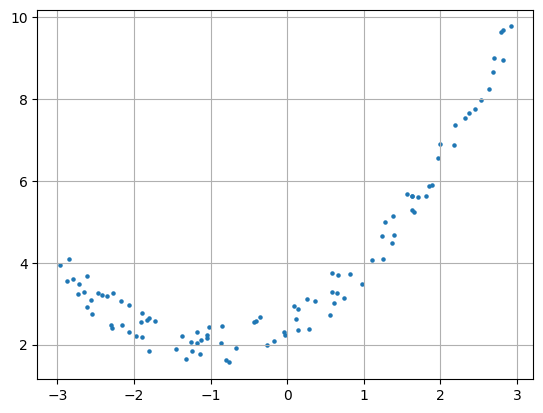

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X, y, s=5)
plt.grid(which='major')
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
X_new = np.array([[2.7, 3.1],[5.4, 6.2]])
y_pred = lin_reg.predict(X_new)

Plot the polynomial regression

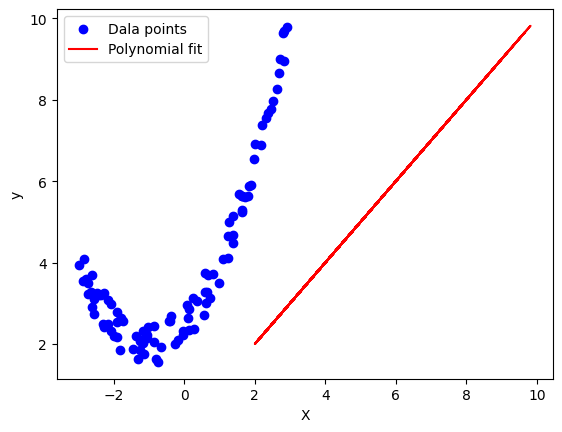

In [26]:
# generating predictions

X_test = 6 * np.random.rand(m, 1) - 3
y_test = 0.5 * X ** 2 + X + 2 + np.random.rand(m, 1)
X_test_poly = poly_features.transform(X_test)
y_test_pred = lin_reg.predict(X_test_poly)

X_fit = np.linspace(1, 10, 100).reshape(-1, 1)
X_fit_poly = poly_features.transform(X_fit)
y_pred = lin_reg.predict(X_fit_poly)

# plotting
plt.scatter(X, y, color='blue', label='Dala points')
plt.plot(y_test_pred, y_test_pred, color='red', label='Polynomial fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

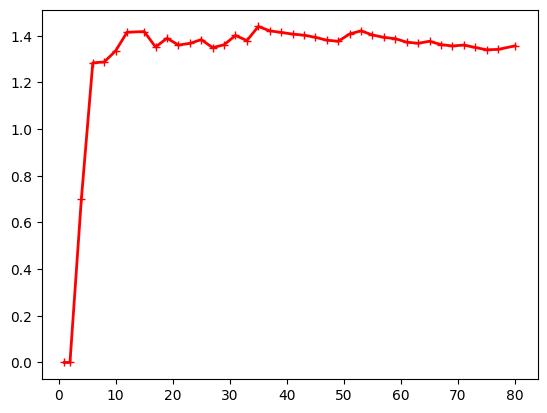

In [28]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv = 5, scoring="neg_root_mean_squared_error"
)
train_errors = -train_scores.mean(axis=1)
vallid_scores = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")